In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

Using TensorFlow backend.


In [3]:
df = pd.read_csv('../data/HousingPrices.csv')

In [4]:
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
SquareFeet    1460 non-null int64
SalePrice     1460 non-null int64
dtypes: int64(2)
memory usage: 22.9 KB


In [8]:
# double array [[]] mean to assin with array container array() else [..]
squaredFeet = df[['SquareFeet']].values
squaredFeet

array([[1710],
       [1262],
       [1786],
       ...,
       [2340],
       [1078],
       [1256]])

In [9]:
saledPrice = df[['SalePrice']].values
saledPrice

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [11]:
# Sequential() for linear layer , input has only 1 value so 1
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,) ))
model.compile(keras.optimizers.Adam(lr=0.8), 'mean_squared_error')

In [13]:
# Train the model, iterating on the data in batches of 10 samples, 30 iterations
model.fit(squaredFeet, saledPrice, epochs=30, batch_size=10)

Epoch 1/30
1460/1460 [==============================] - 1s 465us/step - loss: 17153012553.6438
Epoch 2/30
1460/1460 [==============================] - 0s 94us/step - loss: 3803088928.0000
Epoch 3/30
1460/1460 [==============================] - 0s 66us/step - loss: 3198228039.4521
Epoch 4/30
1460/1460 [==============================] - 0s 65us/step - loss: 3190387566.9041
Epoch 5/30
1460/1460 [==============================] - 0s 66us/step - loss: 3194611939.2877
Epoch 6/30
1460/1460 [==============================] - 0s 74us/step - loss: 3184515159.8904
Epoch 7/30
1460/1460 [==============================] - 0s 64us/step - loss: 3180239264.6575
Epoch 8/30
1460/1460 [==============================] - 0s 73us/step - loss: 3220824782.4658
Epoch 9/30
1460/1460 [==============================] - 0s 90us/step - loss: 3174147808.6575
Epoch 10/30
1460/1460 [==============================] - 0s 100us/step - loss: 3180183725.8082
Epoch 11/30
1460/1460 [==============================] - 0s 72us/s

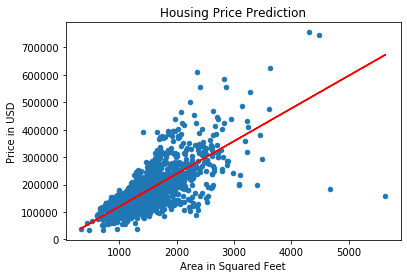

In [20]:
# draw scatter plot
df.plot(kind='scatter', x='SquareFeet', y='SalePrice', title='Housing Price Prediction')
# use the training model
y_pred = model.predict(squaredFeet)
# add the linear line
plt.ylabel('Price in USD')
plt.xlabel('Area in Squared Feet')
plt.plot(squaredFeet, y_pred, color='red')

In [29]:
# feed the SquaredFeet as input and get output as Price
newSquaredFeet = 2000
predictedVal = model.predict([newSquaredFeet])
predictedVal

array([[238838.1]], dtype=float32)

In [33]:
print("{} USD".format(predictedVal))

[[238838.1]] USD
